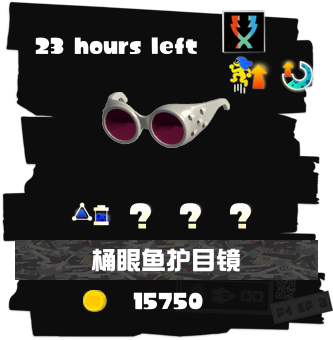

In [42]:
import io
import os
import re
from typing import List
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont, ImageOps
from pathlib import Path

# 资源路径
RESOURCE_PATH = Path()
RESOURCE_PATH.resolve().parents[0]

# 根路径
cur_path = RESOURCE_PATH.resolve().parents[0]

# 图片文件夹
image_folder = os.path.join(cur_path, "staticData", "ImageData")
# 武器文件夹
weapon_folder = os.path.join(cur_path, "staticData", "weapon")
# 字体
ttf_path = os.path.join(cur_path, "staticData", "SplatoonFontFix.otf")
ttf_path_chinese = os.path.join(cur_path, "staticData", "Text.ttf")

tt = os.path.join(cur_path, "staticData", "splatfontfont.otf")
tt_chinese = os.path.join(cur_path, "staticData", "test0.ttf")


brand_folder = os.path.join(cur_path, "staticData", "ImageData", "brand")
gear_folder = os.path.join(cur_path, "staticData", "ImageData", "gear")
skill_folder = os.path.join(cur_path, "staticData", "ImageData", "skill")


# 图片转base64
def image_to_base64(image):
    buffered = BytesIO()
    image.save(buffered, format="PNG")
    return buffered.getvalue()


# 取文件
def get_file(name, format_name="png"):
    img = Image.open(os.path.join(image_folder, "{}.{}".format(name, format_name)))
    return img


# 获取武器
def get_weapon(name):
    return Image.open(os.path.join(weapon_folder, "{}".format(name)))


def get_path_file(path, name, format_name="png"):
    return Image.open(os.path.join(path, "{}.{}".format(name, format_name)))


# 获取品牌
def get_brand(name):
    return get_path_file(brand_folder, name)


# 获取装备
def get_gear(name):
    return get_path_file(gear_folder, name)


# 获取技能
def get_skill(name):
    return get_path_file(skill_folder, name)

def draw_text_central(back_ground, size, text, color):
    # 绘制背景
    back_ground_resized = back_ground.resize(size)
    ttf = ImageFont.truetype(tt_chinese, 25)
    w, h = ttf.getsize(text)
    text_pos = (
        (size[0] - w) / 2,
        (size[1] - h) / 2,
    )
    drawer = ImageDraw.Draw(back_ground_resized)
    drawer.text(text_pos, text, font=ttf, fill=color)
    return back_ground_resized

def draw_text(info: List, box: List, background_img: Image, color: str, font: ImageFont):
    """
    @name：draw_text
    @author： DrinkOolongTea
    @remark： 拼接文字图片
    @param： info: 文字list background_img:图片 color:颜色 font:字体路径
    @return： 拼接后图片
    """
    draw = ImageDraw.Draw(background_img)
    for i in range(len(info)):
        draw.text(box[i], str(info[i]), fill=color, font=font)


def get_brand_skills(brand_key: str, brand_name: str):
    """
    获取品牌容易出的技能key && 不容易出的技能key
    :param brand_name: 品牌中文名
    :param brand_key: 品牌key
    :return: tuple
    """
    global brand_traits, CN_zh, EU_en

    # 容易出的技能key && 不容易出的技能key
    pickup_gears_brand_skills = brand_traits['Traits'][brand_key]
    usual_skill_key = pickup_gears_brand_skills[USUAL_SKILL_KEY]
    unusual_skill_key = pickup_gears_brand_skills[UNUSUAL_SKILL_KEY]

    # 容易出的技能, 描述
    usual_skill = CN_zh[GEAR_POWER_KEY][usual_skill_key]
    usual_skill_desc = CN_zh[GEAR_POWER_DESC_KEY][usual_skill_key]
    # 不容易出的技能, 描述
    unusual_skill = CN_zh[GEAR_POWER_KEY][unusual_skill_key]
    unusual_skill_desc = CN_zh[GEAR_POWER_DESC_KEY][unusual_skill_key]
    logger.debug(
        f'当前特选商店品牌中文名为 {brand_name}, 容易出现的技能为: {usual_skill}, 技能特性为: {usual_skill_desc} '
        f'不容易出现的技能为: {unusual_skill}, 技能特性为: {unusual_skill_desc}')
    return usual_skill_key, unusual_skill_key


gear_key ="Hed_EYE021"
skill_key_list = ['SubInk_Save', 'Unknown', 'Unknown', 'Unknown']
brand_key = "B20"
usual_skill_key = "Action_Up"
unusual_skill_key = "SpecialIncrease_Up"
date_remain = "23 hours left"
price = "15750"
gear_name = "桶眼鱼护目镜"

ttf = ImageFont.truetype(ttf_path, 25)
# 背景
back_ground_raw = get_file("gesotown-tape-blob-bg").convert('RGBA')
# back_ground_raw resize 0.35
(back_w, back_h) = back_ground_raw.size
(back_w, back_h) = (int(back_w * 0.35), int(back_h * 0.35))
back_ground = back_ground_raw.resize((back_w, back_h))

# 装备图
gear_pic = get_gear(gear_key).convert('RGBA')
(g_w, g_h) = gear_pic.size

# 品牌图
brand_pic = get_brand(brand_key).convert('RGBA')
(b_w, b_h) = brand_pic.size
brand_resized = brand_pic.resize((int(b_w * 0.70), int(b_h * 0.70)))

# 品牌背景图
brand_background_pic = get_file("gesotown-brand-bg").convert('RGBA')
brand_background_pic = brand_background_pic.resize(brand_resized.size)
brand_background_pic.paste(brand_resized, (0, 0), brand_resized)

# 价格图
price_pic = get_file("news-bg", "jpg").convert('RGBA')
price_pic_resize = price_pic.resize((back_w - 30, 40), Image.ANTIALIAS)

# 金币图
coin_pic = get_file("gesotown-coin").convert('RGBA')
(c_w, c_h) = coin_pic.size
coin_pic_resize = coin_pic.resize((int(c_w * 1.3), int(c_h * 1.3)), Image.ANTIALIAS)

# 技能表
skill_list = []
for skill_key in skill_key_list:
    skill_raw = get_skill(skill_key).convert('RGBA')
    (skill_w, skill_h) = skill_raw.size
    (new_skill_w, new_skill_h) = (int(skill_w * 0.40), int(skill_h * 0.40))
    skill_list.append(skill_raw.resize((new_skill_w, new_skill_h)))
    
# 易出技能/难出技能
usual_skill_pic = get_skill(usual_skill_key).convert('RGBA')
usual_skill_resized = usual_skill_pic.resize((int(usual_skill_pic.size[0] * 0.40),
                                              int(usual_skill_pic.size[1] * 0.40)), Image.ANTIALIAS)

unusual_skill_pic = get_skill(unusual_skill_key).convert('RGBA')
unusual_skill_resized = unusual_skill_pic.resize((int(unusual_skill_pic.size[0] * 0.40),
                                                  int(unusual_skill_pic.size[1] * 0.40)), Image.ANTIALIAS)

w_unit = skill_list[0].size[0]
h_unit = skill_list[0].size[1]

skill_pic_can = Image.new('RGBA', (w_unit * len(skill_list), h_unit))

for i in range(len(skill_list)):
    skill_pic_can.paste(skill_list[i], (0 + w_unit * i, 0), skill_list[i])
(s_w, s_h) = skill_pic_can.size

# 粘贴装备图
back_ground.paste(gear_pic, (int(back_w / 2 - g_w / 2), int(back_h / 6)), gear_pic)
# 粘贴技能表
back_ground.paste(skill_pic_can, (int(back_w / 2 - s_w / 2), 190), skill_pic_can)
# 粘贴易出技能
back_ground.paste(usual_skill_resized, (int(back_w / 6 * 4), 50), usual_skill_resized)
# 粘贴难出技能
back_ground.paste(unusual_skill_resized, (int(back_w / 6 * 4 + usual_skill_resized.size[0]), 50),
                  unusual_skill_resized)
# 粘贴品牌图
back_ground.paste(brand_background_pic, (int(back_w / 6 * 4), 10), brand_background_pic)
# 粘贴装备名
price_draw = draw_text_central(price_pic_resize, price_pic_resize.size, gear_name, "white")
back_ground.paste(price_draw, (int(back_w / 2 - price_draw.size[0] / 2), 240), price_draw)
# 粘贴价格图
draw_text([price], [(int(back_w / 5 * 2), 275)], back_ground, "white", ttf)
# 粘贴剩余时间
draw_text([date_remain], [(35, 20)], back_ground, "white", ttf)
# 粘贴金币图
back_ground.paste(coin_pic_resize, (int(back_w / 4 * 1), 290), coin_pic_resize)

back_ground